# Playlists Analysis

In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
from scipy import stats

In [3]:
data = pd.read_csv("playlists.csv", sep=";", encoding = "ISO-8859-1") 

In [4]:
data.shape

(1782, 64)

Data extracted.

In [27]:
data.columns

Index(['company', 'playlist_sample', 'namesfiles', 'no', 'artist', 'song',
       'sampleratefiles', 'totalsamplesfiles', 'durationfiles', 'bitratefiles',
       'rmsfiles', 'rmsmedianfiles', 'lowenergyfiles', 'ASRfiles',
       'beatspectrumfiles', 'eventdensityfiles', 'tempofiles',
       'pulseclarityfiles', 'zerocrossfiles', 'rolloffsfiles',
       'brightnessfiles', 'spreadfiles', 'centroidfiles', 'kurtosisfiles',
       'flatnessfiles', 'entropyfiles', 'mfccfiles_1', 'mfccfiles_2',
       'mfccfiles_3', 'mfccfiles_4', 'mfccfiles_5', 'mfccfiles_6',
       'mfccfiles_7', 'mfccfiles_8', 'mfccfiles_9', 'mfccfiles_10',
       'mfccfiles_11', 'mfccfiles_12', 'mfccfiles_13', 'pitchfiles',
       'inharmonicityfiles', 'bestkeyfiles', 'keyclarityfiles',
       'modalityfiles', 'tonalcentroidfiles_1', 'tonalcentroidfiles_2',
       'tonalcentroidfiles_3', 'tonalcentroidfiles_4', 'tonalcentroidfiles_5',
       'tonalcentroidfiles_6', 'chromagramfiles_1', 'chromagramfiles_2',
       'chromag

In [28]:
data.describe(include="all")

,company,playlist_sample,namesfiles,no,artist,song,sampleratefiles,totalsamplesfiles,durationfiles,bitratefiles,...,chromagramfiles_5,chromagramfiles_6,chromagramfiles_7,chromagramfiles_8,chromagramfiles_9,chromagramfiles_10,chromagramfiles_11,chromagramfiles_12,attackslopefiles,attackleapfiles
count,1782,1782.000000,1782,1782.000000,1782,1782,1782.0,1.782000e+03,1782.000000,1782.000000,...,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
unique,6,NaN,515,NaN,353,443,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arte Francés,NaN,18 - Minimatic - No Swinggity.mp3 ...,NaN,Satin Jackets,Hula Hoop.mp3 ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,441,NaN,6,NaN,51,12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.084175,NaN,17.116162,NaN,NaN,44100.0,1.043632e+07,236.651237,252.336700,...,0.332301,0.319191,0.265246,0.440462,0.549565,0.581967,0.477825,0.430522,15.804409,0.507503
std,NaN,1.114796,NaN,11.837401,NaN,NaN,0.0,3.227105e+06,73.176981,88.377597,...,0.270616,0.263919,0.249612,0.290454,0.314771,0.323173,0.321646,0.295563,9.338659,0.247587
min,NaN,1.000000,NaN,1.000000,NaN,NaN,44100.0,5.965054e+06,135.262000,128.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168304
25%,NaN,1.000000,NaN,8.000000,NaN,NaN,44100.0,8.353151e+06,189.413850,128.000000,...,0.116591,0.109123,0.075378,0.204738,0.301961,0.316822,0.214680,0.203097,9.810711,0.285584
50%,NaN,2.000000,NaN,15.500000,NaN,NaN,44100.0,9.480378e+06,214.974562,320.000000,...,0.262799,0.259887,0.183082,0.396861,0.520957,0.570088,0.418077,0.379737,14.833864,0.452456
75%,NaN,3.000000,NaN,24.000000,NaN,NaN,44100.0,1.146931e+07,260.075075,320.000000,...,0.494897,0.469603,0.384485,0.642814,0.829318,0.918554,0.735384,0.616558,19.964413,0.730669


In [6]:
data.head()

,company,playlist_sample,namesfiles,no,artist,song,sampleratefiles,totalsamplesfiles,durationfiles,bitratefiles,...,chromagramfiles_5,chromagramfiles_6,chromagramfiles_7,chromagramfiles_8,chromagramfiles_9,chromagramfiles_10,chromagramfiles_11,chromagramfiles_12,attackslopefiles,attackleapfiles
0,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320,...,0.088080,0.344721,0.000000,0.029990,0.000000,0.123955,0.999999,0.025801,17.573492,0.456036
1,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320,...,0.174508,0.340706,0.191612,0.860171,0.415158,0.372546,1.000000,0.333313,3.057561,0.258182
2,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320,...,0.151998,0.348799,0.194046,0.831852,0.582866,0.444389,1.000000,0.254364,20.069370,0.229477
3,Arte Francés,4,02 - Shazalakazoo - Sunny Side Of The Street.m...,2,Shazalakazoo,Sunny Side Of The Street.mp3 ...,44100,11231507,254.682700,320,...,0.183869,0.046128,0.047070,0.103043,0.912696,1.000000,0.104921,0.131453,6.403050,0.169508
4,Arte Francés,4,02 - Shazalakazoo - Sunny Side Of The Street.m...,2,Shazalakazoo,Sunny Side Of The Street.mp3 ...,44100,11231507,254.682700,320,...,0.179867,0.029339,0.036758,0.070648,0.916178,1.000000,0.090701,0.125767,10.845848,0.402227


Find positives and negatives songs of the process for every company.

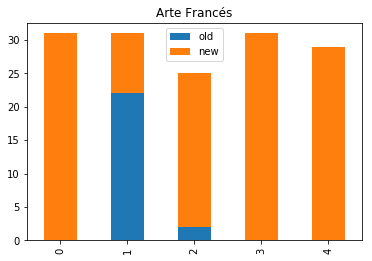

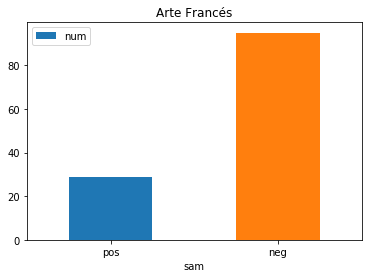

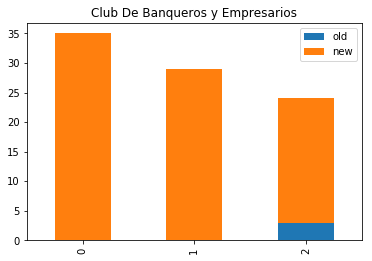

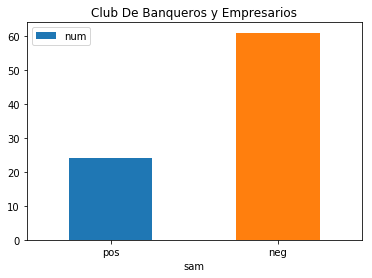

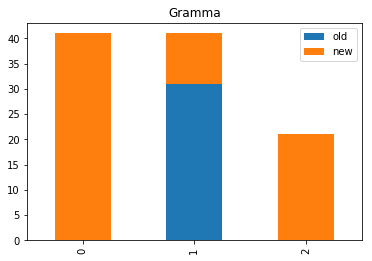

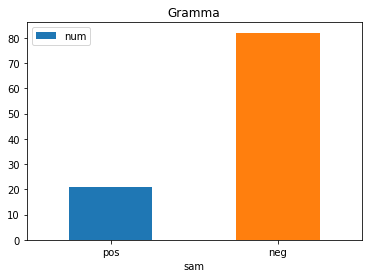

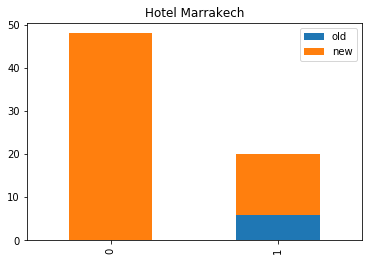

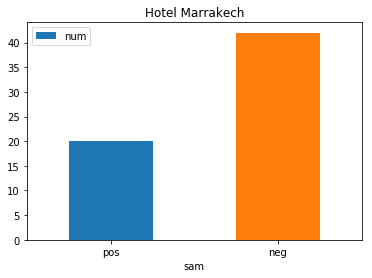

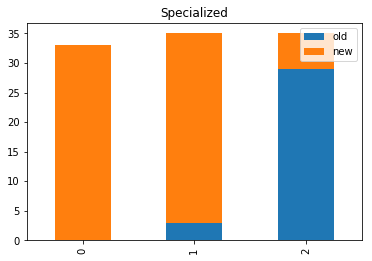

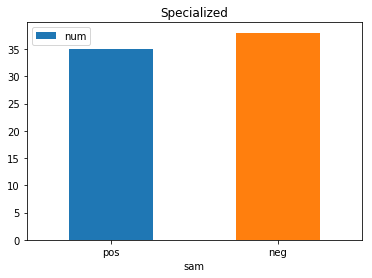

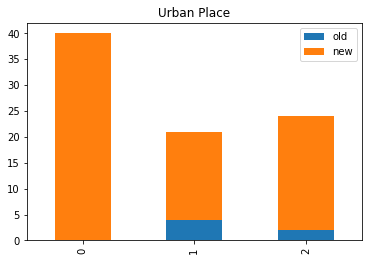

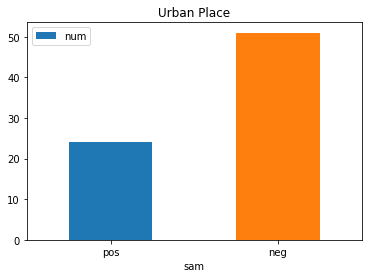

In [5]:
companies = data['company'].unique()
by_company = [data[data.company == company] for company in companies]
positives = []
negatives = []
for data_com in by_company:
    data_com = data_com.sort_values('playlist_sample')
    last_pl = int(data_com.tail(1).playlist_sample)
    pls = pd.DataFrame({'pl':range (1,last_pl+1), 'old':[0]*last_pl, 'new':[0]*last_pl})
    pls.new[0]=(data_com.query('playlist_sample == '+str(1)).shape[0])/3
    for i in range(2,last_pl+1):
        curr_pl = data_com.query('playlist_sample == '+str(i))
        pre_pl = data_com.query('playlist_sample == '+str(i-1))
        olds = curr_pl['song'].map(pre_pl['song'].value_counts()).sum(axis = 0)/3
        pls.old[i-1]= olds/3 
        pls.new[i-1]=(curr_pl.shape[0]-olds)/3
    pls[['old','new']].plot(kind='bar', stacked=True, title=data_com.iloc[0,0])
    df_last_pl= data_com.query('playlist_sample == '+str(last_pl))
    positives.append(df_last_pl)
    pos_loc = pd.DataFrame({}, columns=data_com.columns)
    for index, row in data_com[data_com.playlist_sample<last_pl].iterrows(): 
        if not ((df_last_pl['artist'] == row['artist']) & (df_last_pl['song'] ==  row['song'])).any():
            pos_loc= pos_loc.append(row, ignore_index=True)
    n_vs_p = pd.DataFrame({'sam':['pos', 'neg'],'num':[df_last_pl.shape[0]/3,pos_loc.shape[0]/3]})
    n_vs_p.plot.bar(x='sam', y='num', rot=0, title=data_com.iloc[0,0])
    negatives.append(pos_loc)

Count of positives negatives and total by company.

In [80]:
for i in range(len(companies)):
    print(companies[i])
    print("Negatives: ",negatives[i].shape[0]/3)
    print("Positives: ",positives[i].shape[0]/3)
    print("Total: ", by_company[i].shape[0]/3)

Arte Francés
Negatives:  95.0
Positives:  29.0
Total:  147.0
Club De Banqueros y Empresarios
Negatives:  61.0
Positives:  24.0
Total:  88.0
Gramma
Negatives:  82.0
Positives:  21.0
Total:  103.0
Hotel Marrakech
Negatives:  42.0
Positives:  20.0
Total:  68.0
Specialized
Negatives:  38.0
Positives:  35.0
Total:  103.0
Urban Place
Negatives:  51.0
Positives:  24.0
Total:  85.0


Append the positives and negatives records with a new column "chosen" that takes value of 1 if is chosen.

In [62]:
df_n_ps = []
for i in range(len(negatives)):
    negatives[i]['chosen']=0
    positives[i]['chosen']=1
    df_n_ps.append(negatives[i].append(positives[i]))

D:\Usuarios\1144084318\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## ANOVA

Shows regression results for post hoc tukey comparison p values lesser than 0.05. After that, it shows the homogeneity of variance and normality tests (which are assumptions of Anova test). 

****************************************************************************
Arte Francés
mfccfiles_2
mfccfiles_6
mfccfiles_8
mfccfiles_11
keyclarityfiles
****************************************************************************
Club De Banqueros y Empresarios
lowenergyfiles
tempofiles
pulseclarityfiles
zerocrossfiles
brightnessfiles
                            OLS Regression Results                            
Dep. Variable:        brightnessfiles   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     43.84
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.12e-10
Time:                        14:56:44   Log-Likelihood:                 226.10
No. Observations:                 255   AIC:                            -448.2
Df Residuals:                     253   BIC:                            -441.1
Df Model:                    

inharmonicityfiles
chromagramfiles_10
****************************************************************************
Hotel Marrakech
rmsfiles
                            OLS Regression Results                            
Dep. Variable:               rmsfiles   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     17.56
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.32e-05
Time:                        14:56:44   Log-Likelihood:                 240.55
No. Observations:                 186   AIC:                            -477.1
Df Residuals:                     184   BIC:                            -470.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025

spreadfiles
centroidfiles
flatnessfiles
entropyfiles
mfccfiles_1
chromagramfiles_5
chromagramfiles_7
****************************************************************************
Urban Place
mfccfiles_12
                            OLS Regression Results                            
Dep. Variable:           mfccfiles_12   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     14.42
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           0.000189
Time:                        14:56:45   Log-Likelihood:                 185.01
No. Observations:                 225   AIC:                            -366.0
Df Residuals:                     223   BIC:                            -359.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
       

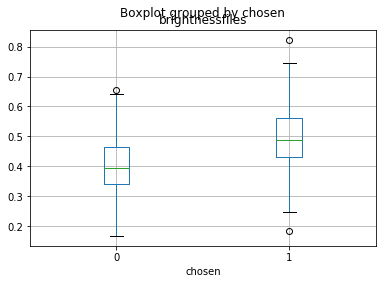

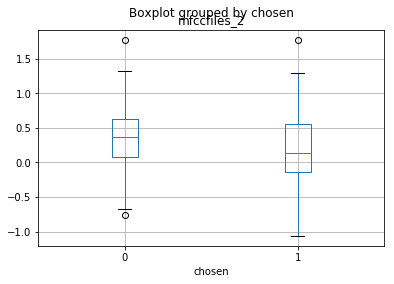

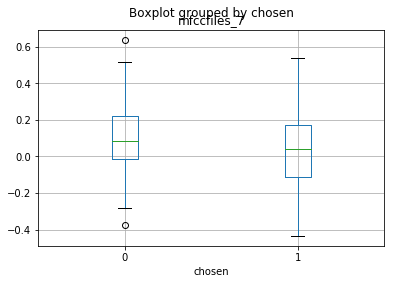

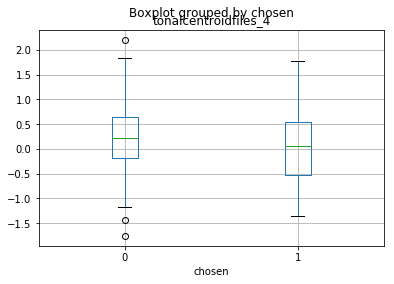

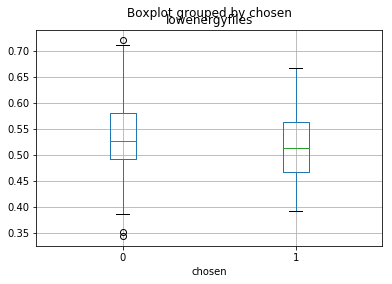

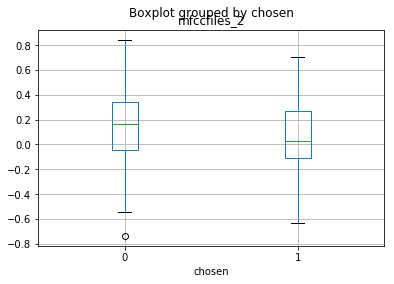

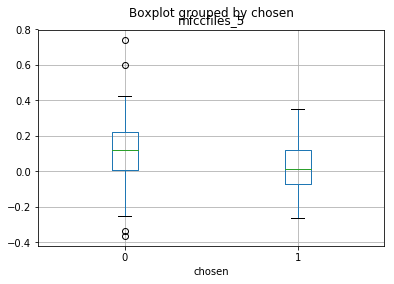

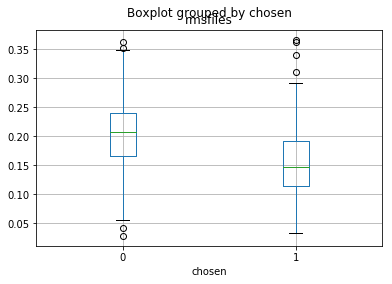

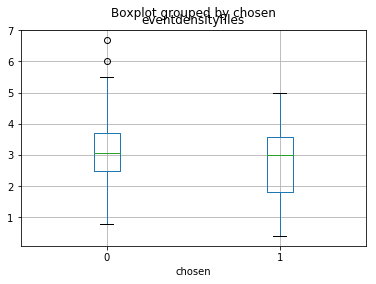

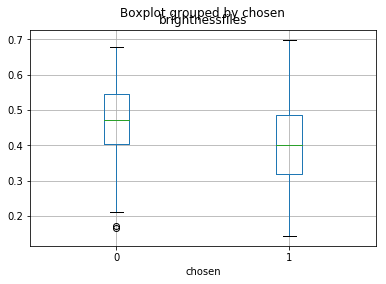

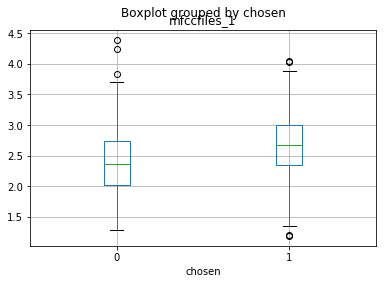

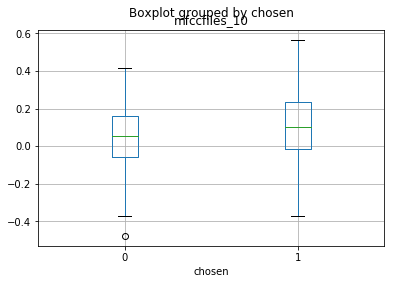

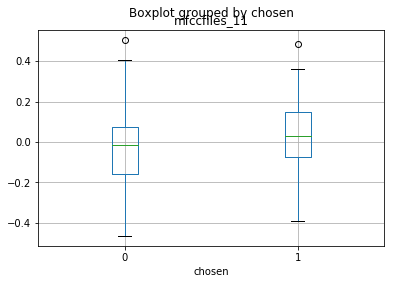

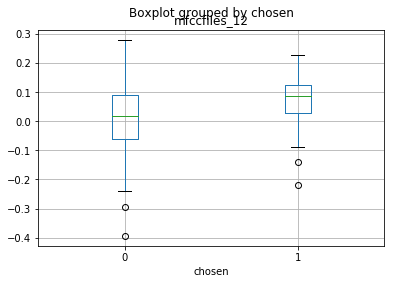

In [173]:
alpha = 0.05
for df_n_p in df_n_ps:
    print("****************************************************************************")
    print(df_n_p.iloc[0,0])
    for index in range(10,df_n_p.shape[1]-1):
        name= df_n_p.columns.values[index]
        df_n_p[name]=df_n_p[name].astype('float64') 
        mc = MultiComparison(df_n_p[name], df_n_p['chosen'])
        mc_results = mc.tukeyhsd()
        if mc_results._results_table.data[1:][0][5]:
            print(name)
            results = ols(name+' ~ C(chosen)', data=df_n_p).fit()
            homogeneity_test = stats.levene(df_n_p[name][df_n_p['chosen'] == 0], df_n_p[name][df_n_p['chosen'] == 1])[1]
            normality_test = stats.shapiro(results.resid)[1]
            if homogeneity_test > alpha and normality_test > alpha:
                print(results.summary())
                df_n_p.boxplot(name, by='chosen')

# Pregunta:
¿También se debe hacer de comparación de todas las canciones que están registradas por compañía sin importar el playlist o entre compañía tomando solo los positives (ult pl))?

# Clustering

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 64 columns):
company                 1782 non-null object
playlist_sample         1782 non-null int64
namesfiles              1782 non-null object
no                      1782 non-null int64
artist                  1782 non-null object
song                    1782 non-null object
sampleratefiles         1782 non-null int64
totalsamplesfiles       1782 non-null int64
durationfiles           1782 non-null float64
bitratefiles            1782 non-null int64
rmsfiles                1782 non-null float64
rmsmedianfiles          1782 non-null float64
lowenergyfiles          1782 non-null float64
ASRfiles                1782 non-null float64
beatspectrumfiles       1782 non-null float64
eventdensityfiles       1782 non-null float64
tempofiles              1782 non-null float64
pulseclarityfiles       1782 non-null float64
zerocrossfiles          1782 non-null float64
rolloffsfiles           1782 non-

In [8]:
data.bitratefiles = data.bitratefiles.astype('float64')
data.pitchfiles = data.pitchfiles.astype('float64')
data.bestkeyfiles = data.bestkeyfiles.astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 64 columns):
company                 1782 non-null object
playlist_sample         1782 non-null int64
namesfiles              1782 non-null object
no                      1782 non-null int64
artist                  1782 non-null object
song                    1782 non-null object
sampleratefiles         1782 non-null int64
totalsamplesfiles       1782 non-null int64
durationfiles           1782 non-null float64
bitratefiles            1782 non-null float64
rmsfiles                1782 non-null float64
rmsmedianfiles          1782 non-null float64
lowenergyfiles          1782 non-null float64
ASRfiles                1782 non-null float64
beatspectrumfiles       1782 non-null float64
eventdensityfiles       1782 non-null float64
tempofiles              1782 non-null float64
pulseclarityfiles       1782 non-null float64
zerocrossfiles          1782 non-null float64
rolloffsfiles           1782 no

Vamos a reemplazar los NaN y entonces a normalizar los datos para que todas las variables tengan la misma importancia. Solo vamos a considerar los datos numéricos.

In [9]:
data = data.fillna(0)
dataStd = pd.DataFrame(preprocessing.scale(data.iloc[:,8:]))
dataStd.columns=data.columns[8:]
dataStd.mean(axis=0)

durationfiles           2.118271e-17
bitratefiles            9.565861e-16
rmsfiles               -4.236541e-17
rmsmedianfiles         -9.469916e-18
lowenergyfiles          6.322415e-16
ASRfiles                2.117025e-16
beatspectrumfiles       1.189814e-16
eventdensityfiles      -4.901304e-16
tempofiles              4.909404e-17
pulseclarityfiles       8.270601e-17
zerocrossfiles          1.672188e-16
rolloffsfiles           3.420384e-16
brightnessfiles        -1.221121e-17
spreadfiles            -3.812887e-17
centroidfiles          -4.494472e-16
kurtosisfiles          -1.564717e-16
flatnessfiles           3.293288e-16
entropyfiles            8.131667e-16
mfccfiles_1             1.659104e-16
mfccfiles_2             3.140025e-17
mfccfiles_3             2.759982e-17
mfccfiles_4            -5.519964e-17
mfccfiles_5            -8.756557e-17
mfccfiles_6             7.026117e-17
mfccfiles_7            -8.641298e-17
mfccfiles_8            -4.383730e-17
mfccfiles_9             2.678989e-18
m

In [10]:
dataStd.std(axis=0)

durationfiles           1.000281
bitratefiles            1.000281
rmsfiles                1.000281
rmsmedianfiles          1.000281
lowenergyfiles          1.000281
ASRfiles                1.000281
beatspectrumfiles       1.000281
eventdensityfiles       1.000281
tempofiles              1.000281
pulseclarityfiles       1.000281
zerocrossfiles          1.000281
rolloffsfiles           1.000281
brightnessfiles         1.000281
spreadfiles             1.000281
centroidfiles           1.000281
kurtosisfiles           1.000281
flatnessfiles           1.000281
entropyfiles            1.000281
mfccfiles_1             1.000281
mfccfiles_2             1.000281
mfccfiles_3             1.000281
mfccfiles_4             1.000281
mfccfiles_5             1.000281
mfccfiles_6             1.000281
mfccfiles_7             1.000281
mfccfiles_8             1.000281
mfccfiles_9             1.000281
mfccfiles_10            1.000281
mfccfiles_11            1.000281
mfccfiles_12            1.000281
mfccfiles_

In [41]:
dataStd = dataStd.drop(columns="pitchfiles")

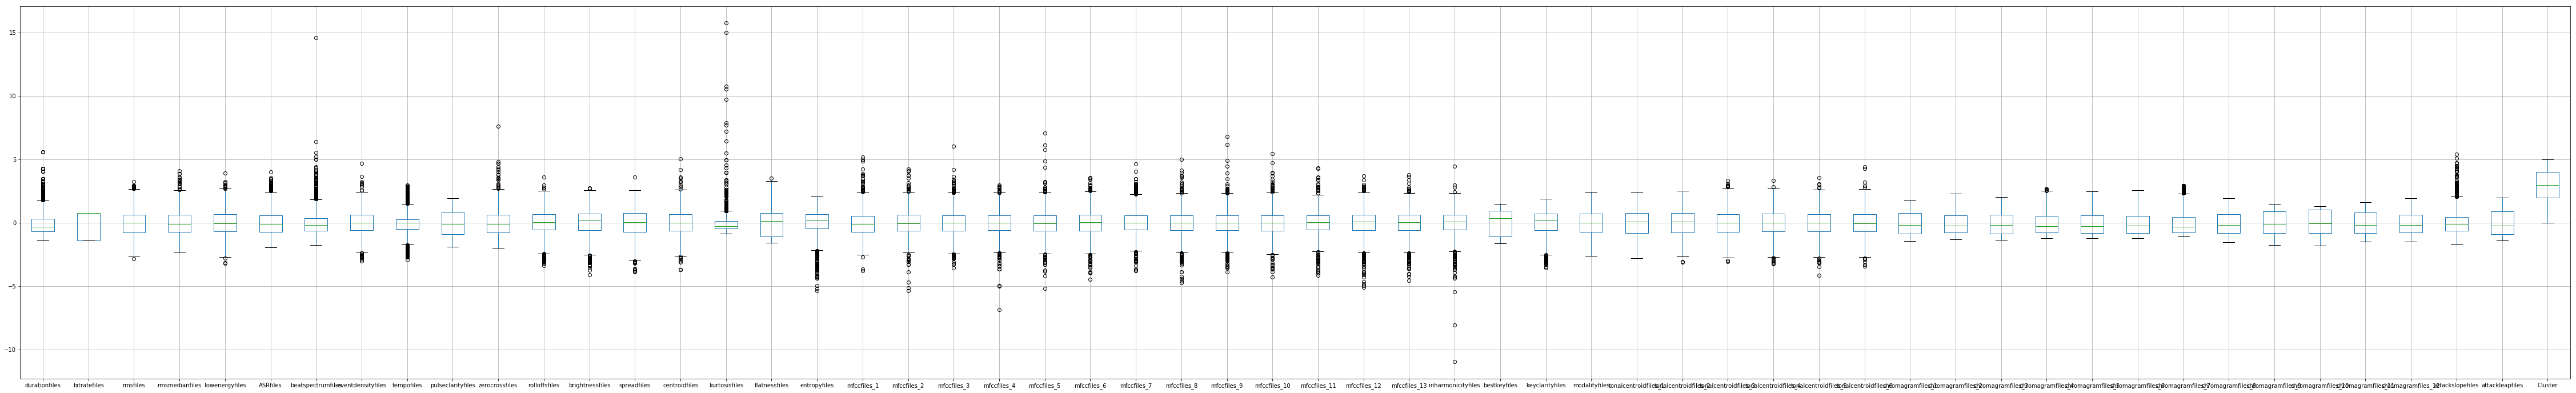

In [42]:
plt.figure(figsize=(80,12))
dataStd.boxplot()

## Clustering

**Con un k de 6 (compañías), realice un clustering por K-Means (utilicen random_state=0).**

**Agregue una columna "Cluster" con el segmento correspondiente (0, 1, o 2) al dataset.**

In [43]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans.fit(dataStd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

El objeto resultado del KMeans después de lanzado el ajuste del algoritmo consta de diferentes valores de salida:
- **cluster_centers_**: los centroides finales de los clusters.
- **labels_**: los clusters a los cuales termina perteneciendo cada instancia del set de aprendizaje.
- **interia_**: el WSS final.
- **n_iter_**: el número de iteraciones que tomó llegar a convergencia.

In [44]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:n",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 13 iteraciones llegar a convergencia, con un WSS final de:n 80043.76018558905 y los centroides siguientes: [[-2.91329891e-01 -3.83922121e-01 -3.09637488e-01 -1.60211975e-01
  -4.04184894e-01 -3.73187024e-01 -1.81109692e-01  4.36100815e-02
   5.40875602e-02 -3.68019798e-01 -9.23385426e-02 -1.23250715e-01
  -3.64026471e-02 -2.79623041e-01 -1.83189748e-01 -1.68902758e-01
  -4.54926662e-01  7.17816495e-03  1.19643485e-01 -6.90695957e-02
  -1.03690379e-01 -8.76831714e-02 -1.30911274e-01 -4.69733077e-02
  -1.56578114e-01  2.42787816e-02  3.40434997e-02  7.39207136e-02
  -7.31649862e-02  4.82083331e-02 -1.49188680e-01  1.06469904e-02
   2.66050529e-02  3.91539740e-01  2.81647021e-01  5.83558754e-01
  -1.26627945e+00 -1.63768525e-01 -2.96829414e-01 -1.49932277e-01
   1.01723525e-01 -9.20836243e-01  4.12457909e-01 -1.02397823e-02
  -3.93417204e-01  6.16118478e-01 -6.98058597e-01  9.77599213e-01
  -6.16744373e-01 -2.48958064e-01  2.22294919e-01 -8.15723618e-01
   6.14555107e-01 

In [45]:
kmeans.labels_

array([4, 2, 2, ..., 3, 3, 3])

In [46]:
clusters = kmeans.predict(dataStd)
clusters

array([4, 2, 2, ..., 3, 3, 3])

In [47]:
counter=Counter(clusters)
print(counter)

Counter({5: 384, 2: 376, 0: 298, 3: 284, 4: 223, 1: 217})


In [48]:
data.loc[:,'Cluster'] = clusters
dataStd.loc[:,'Cluster'] = clusters

In [49]:
data.head()

,company,playlist_sample,namesfiles,no,artist,song,sampleratefiles,totalsamplesfiles,durationfiles,bitratefiles,...,chromagramfiles_6,chromagramfiles_7,chromagramfiles_8,chromagramfiles_9,chromagramfiles_10,chromagramfiles_11,chromagramfiles_12,attackslopefiles,attackleapfiles,Cluster
0,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320.0,...,0.344721,0.000000,0.029990,0.000000,0.123955,0.999999,0.025801,17.573492,0.456036,4
1,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320.0,...,0.340706,0.191612,0.860171,0.415158,0.372546,1.000000,0.333313,3.057561,0.258182,2
2,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320.0,...,0.348799,0.194046,0.831852,0.582866,0.444389,1.000000,0.254364,20.069370,0.229477,2
3,Arte Francés,4,02 - Shazalakazoo - Sunny Side Of The Street.m...,2,Shazalakazoo,Sunny Side Of The Street.mp3 ...,44100,11231507,254.682700,320.0,...,0.046128,0.047070,0.103043,0.912696,1.000000,0.104921,0.131453,6.403050,0.169508,3
4,Arte Francés,4,02 - Shazalakazoo - Sunny Side Of The Street.m...,2,Shazalakazoo,Sunny Side Of The Street.mp3 ...,44100,11231507,254.682700,320.0,...,0.029339,0.036758,0.070648,0.916178,1.000000,0.090701,0.125767,10.845848,0.402227,3


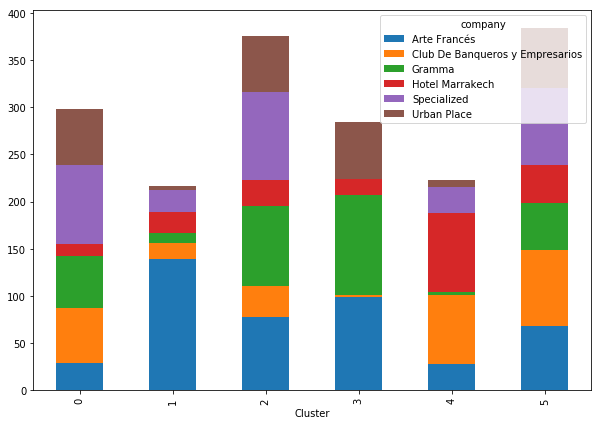

In [50]:
#colors = ["#006D2C", "#31A354","#74C476"]

stacked = data.groupby(['company','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='company', values=0)
pivot_df.loc[:,companies].plot.bar(stacked=True, figsize=(10,7))
#stacked[['Cluster','company']].plot(kind='bar', stacked=True)

In [37]:
df_pos = pd.DataFrame({}, columns=positives[0].columns)
for pos in positives:
    df_pos = df_pos.append(pos)
df_pos

,company,playlist_sample,namesfiles,no,artist,song,sampleratefiles,totalsamplesfiles,durationfiles,bitratefiles,...,chromagramfiles_5,chromagramfiles_6,chromagramfiles_7,chromagramfiles_8,chromagramfiles_9,chromagramfiles_10,chromagramfiles_11,chromagramfiles_12,attackslopefiles,attackleapfiles
155,Arte Francés,5,22 - Satin Jackets - Through The Night.mp3 ...,22,Satin Jackets,Through The Night.mp3 ...,44100,11374846,257.933025,320,...,0.057267,0.162758,0.010425,0.190472,0.325653,0.209082,0.244564,0.182880,11.250467,0.998344
154,Arte Francés,5,22 - Satin Jackets - Through The Night.mp3 ...,22,Satin Jackets,Through The Night.mp3 ...,44100,11374846,257.933025,320,...,0.229308,0.268554,0.095670,1.000000,0.382504,0.319393,0.415200,0.195412,15.740476,0.259298
153,Arte Francés,5,22 - Satin Jackets - Through The Night.mp3 ...,22,Satin Jackets,Through The Night.mp3 ...,44100,11374846,257.933025,320,...,0.000000,0.113983,0.002719,0.668060,0.005316,0.523304,0.000000,0.000000,0.261721,0.995828
152,Arte Francés,5,21 - Jamiroquai - Cloud 9.mp3 ...,21,Jamiroquai,Cloud 9.mp3 ...,44100,10452095,237.008950,320,...,0.753205,0.385858,0.164653,0.751055,0.539611,1.000000,0.558476,0.444752,1.638126,0.456254
151,Arte Francés,5,21 - Jamiroquai - Cloud 9.mp3 ...,21,Jamiroquai,Cloud 9.mp3 ...,44100,10452095,237.008950,320,...,0.478498,0.133377,0.008754,0.585764,0.808214,1.000000,0.793601,0.704087,2.854220,0.771901
150,Arte Francés,5,21 - Jamiroquai - Cloud 9.mp3 ...,21,Jamiroquai,Cloud 9.mp3 ...,44100,10452095,237.008950,320,...,0.668139,0.219179,0.111709,0.706230,0.501457,1.000000,0.462218,0.368790,15.569426,0.226973
149,Arte Francés,5,20 - LaTrece - I Want To Thank You (Dr Packer ...,20,LaTrece,I Want To Thank You (Dr Packer Edit).mp3 ...,44100,17699327,401.345275,320,...,0.384774,0.534232,0.192714,0.655851,0.269282,0.903795,1.000000,0.703164,15.925463,0.745735
148,Arte Francés,5,20 - LaTrece - I Want To Thank You (Dr Packer ...,20,LaTrece,I Want To Thank You (Dr Packer Edit).mp3 ...,44100,17699327,401.345275,320,...,0.218961,0.403663,0.322634,0.920284,0.801702,1.000000,0.827325,0.592113,11.240509,0.869050
156,Arte Francés,5,23 - Uppermost - Step by Step.mp3 ...,23,Uppermost,Step by Step.mp3 ...,44100,9686015,219.637525,320,...,0.756740,0.229112,0.311052,0.290706,1.000000,0.939009,0.310257,0.365241,7.535086,0.698098
178,Arte Francés,5,30 - Two Door Cinema Club - Bad Decisions (Pur...,30,Two Door Cinema Club,Bad Decisions (Purple Disco Machine Remix).mp...,44100,20509054,465.057925,320,...,0.096476,0.569051,0.041137,0.596460,0.393148,0.396214,0.954543,0.342183,34.840109,0.259006


In [38]:
df_pos.bitratefiles = df_pos.bitratefiles.astype('float64')
df_pos.pitchfiles = df_pos.pitchfiles.astype('float64')
df_pos.bestkeyfiles = df_pos.bestkeyfiles.astype('float64')
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 155 to 1781
Data columns (total 64 columns):
company                 459 non-null object
playlist_sample         459 non-null object
namesfiles              459 non-null object
no                      459 non-null object
artist                  459 non-null object
song                    459 non-null object
sampleratefiles         459 non-null object
totalsamplesfiles       459 non-null object
durationfiles           459 non-null float64
bitratefiles            459 non-null float64
rmsfiles                459 non-null float64
rmsmedianfiles          459 non-null float64
lowenergyfiles          459 non-null float64
ASRfiles                459 non-null float64
beatspectrumfiles       459 non-null float64
eventdensityfiles       459 non-null float64
tempofiles              459 non-null float64
pulseclarityfiles       459 non-null float64
zerocrossfiles          459 non-null float64
rolloffsfiles           459 non-null float64


Vamos a reemplazar los NaN y entonces a normalizar los datos para que todas las variables tengan la misma importancia. Solo vamos a considerar los datos numéricos.

In [39]:
df_pos = df_pos.fillna(0)
df_std_pos = pd.DataFrame(preprocessing.scale(df_pos.iloc[:,8:]))
df_std_pos.columns=df_pos.columns[8:]
df_std_pos.mean(axis=0)

durationfiles          -2.418787e-18
bitratefiles            4.789197e-17
rmsfiles                8.949510e-17
rmsmedianfiles          2.012430e-16
lowenergyfiles         -6.167906e-16
ASRfiles               -2.147882e-16
beatspectrumfiles       2.574042e-16
eventdensityfiles       2.803374e-16
tempofiles             -1.736689e-16
pulseclarityfiles      -6.470254e-17
zerocrossfiles         -1.083616e-16
rolloffsfiles           1.489973e-16
brightnessfiles         7.087045e-16
spreadfiles             2.467162e-16
centroidfiles           2.128532e-16
kurtosisfiles          -2.987201e-17
flatnessfiles          -5.950215e-17
entropyfiles            8.567342e-16
mfccfiles_1            -6.395272e-16
mfccfiles_2             6.143718e-17
mfccfiles_3             1.064266e-17
mfccfiles_4            -6.361409e-17
mfccfiles_5            -5.647867e-17
mfccfiles_6             1.904794e-17
mfccfiles_7             5.055264e-17
mfccfiles_8            -2.207143e-17
mfccfiles_9             4.136125e-17
m

In [40]:
df_std_pos.std(axis=0)

durationfiles           1.001091
bitratefiles            1.001091
rmsfiles                1.001091
rmsmedianfiles          1.001091
lowenergyfiles          1.001091
ASRfiles                1.001091
beatspectrumfiles       1.001091
eventdensityfiles       1.001091
tempofiles              1.001091
pulseclarityfiles       1.001091
zerocrossfiles          1.001091
rolloffsfiles           1.001091
brightnessfiles         1.001091
spreadfiles             1.001091
centroidfiles           1.001091
kurtosisfiles           1.001091
flatnessfiles           1.001091
entropyfiles            1.001091
mfccfiles_1             1.001091
mfccfiles_2             1.001091
mfccfiles_3             1.001091
mfccfiles_4             1.001091
mfccfiles_5             1.001091
mfccfiles_6             1.001091
mfccfiles_7             1.001091
mfccfiles_8             1.001091
mfccfiles_9             1.001091
mfccfiles_10            1.001091
mfccfiles_11            1.001091
mfccfiles_12            1.001091
mfccfiles_

In [51]:
df_std_pos = df_std_pos.drop(columns="pitchfiles")

In [54]:
kmeans_pos = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans_pos.fit(df_std_pos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [55]:
kmeans_pos.labels_

array([4, 4, 2, 2, 0, 2, 4, 4, 3, 4, 4, 4, 2, 1, 1, 2, 2, 2, 4, 4, 3, 4,
       2, 1, 1, 1, 4, 4, 4, 5, 4, 5, 1, 1, 1, 4, 4, 4, 5, 5, 5, 3, 1, 2,
       5, 5, 5, 1, 2, 1, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 3, 5, 5, 5, 1, 2,
       2, 2, 1, 1, 1, 4, 4, 4, 0, 4, 4, 3, 0, 0, 4, 0, 4, 4, 2, 4, 4, 2,
       3, 3, 3, 2, 2, 0, 0, 0, 1, 1, 5, 2, 0, 2, 4, 3, 0, 4, 2, 2, 2, 4,
       0, 3, 3, 3, 3, 2, 2, 2, 3, 4, 3, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 4, 2, 4, 1, 1, 3, 3, 3, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 1, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5, 1, 5, 1, 5, 3, 3,
       3, 5, 5, 5, 5, 5, 1, 2, 2, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 4,
       2, 4, 4, 4, 4, 2, 5, 2, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 1, 1, 1, 1,
       5, 2, 0, 0, 3, 3, 0, 0, 0, 0, 4, 1, 4, 0, 3, 0, 5, 1, 5, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 5, 0, 2, 3, 2, 5, 3, 0, 3, 0, 0, 0, 2, 2, 2, 4,
       4, 4, 3, 3, 0, 3, 3, 0, 0, 4, 0, 1, 0, 3, 0, 3, 2, 5, 3, 3, 1, 1,
       1, 4, 1, 1, 3, 3, 3, 0, 2, 4, 2, 2, 1, 4, 4,

In [56]:
clusters = kmeans_pos.predict(df_std_pos)
clusters

array([4, 4, 2, 2, 0, 2, 4, 4, 3, 4, 4, 4, 2, 1, 1, 2, 2, 2, 4, 4, 3, 4,
       2, 1, 1, 1, 4, 4, 4, 5, 4, 5, 1, 1, 1, 4, 4, 4, 5, 5, 5, 3, 1, 2,
       5, 5, 5, 1, 2, 1, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 3, 5, 5, 5, 1, 2,
       2, 2, 1, 1, 1, 4, 4, 4, 0, 4, 4, 3, 0, 0, 4, 0, 4, 4, 2, 4, 4, 2,
       3, 3, 3, 2, 2, 0, 0, 0, 1, 1, 5, 2, 0, 2, 4, 3, 0, 4, 2, 2, 2, 4,
       0, 3, 3, 3, 3, 2, 2, 2, 3, 4, 3, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 4, 2, 4, 1, 1, 3, 3, 3, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 1, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5, 1, 5, 1, 5, 3, 3,
       3, 5, 5, 5, 5, 5, 1, 2, 2, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 4,
       2, 4, 4, 4, 4, 2, 5, 2, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 1, 1, 1, 1,
       5, 2, 0, 0, 3, 3, 0, 0, 0, 0, 4, 1, 4, 0, 3, 0, 5, 1, 5, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 5, 0, 2, 3, 2, 5, 3, 0, 3, 0, 0, 0, 2, 2, 2, 4,
       4, 4, 3, 3, 0, 3, 3, 0, 0, 4, 0, 1, 0, 3, 0, 3, 2, 5, 3, 3, 1, 1,
       1, 4, 1, 1, 3, 3, 3, 0, 2, 4, 2, 2, 1, 4, 4,

In [57]:
counter=Counter(clusters)
print(counter)

Counter({2: 109, 1: 96, 5: 78, 3: 67, 4: 59, 0: 50})


In [59]:
df_pos.loc[:,'Cluster'] = clusters
df_std_pos.loc[:,'Cluster'] = clusters

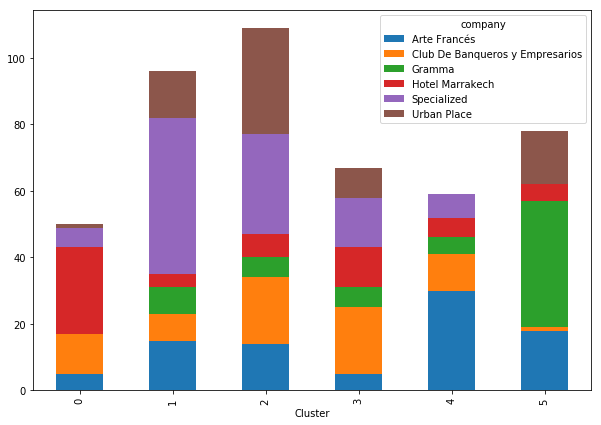

In [60]:
stacked = df_pos.groupby(['company','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='company', values=0)
pivot_df.loc[:,companies].plot.bar(stacked=True, figsize=(10,7))

In [63]:
df_n_ps[0]

,company,playlist_sample,namesfiles,no,artist,song,sampleratefiles,totalsamplesfiles,durationfiles,bitratefiles,...,chromagramfiles_6,chromagramfiles_7,chromagramfiles_8,chromagramfiles_9,chromagramfiles_10,chromagramfiles_11,chromagramfiles_12,attackslopefiles,attackleapfiles,chosen
0,Arte Francés,1,14 - Sonny Alven - Backseat Lovin' (Cavego Rem...,14,Sonny Alven,Backseat Lovin' (Cavego Remix).mp3 ...,44100,10074238,228.440775,320,...,0.703913,0.134777,0.439297,0.414337,0.759675,0.273383,0.463493,10.299749,0.224341,0
1,Arte Francés,1,04 - 11 Acorn Lane - Perfect (Electro Swing Re...,4,11 Acorn Lane,Perfect (Electro Swing Remix).mp3 ...,44100,8932606,202.553425,320,...,0.359089,0.301820,1.000000,0.584436,0.797950,0.513893,0.513712,7.917774,0.928387,0
2,Arte Francés,1,05 - Dimie Cat - Glam (Electro-swing Remix).mp...,5,Dimie Cat,Glam (Electro-swing Remix).mp3,44100,8249471,187.062825,320,...,0.031553,0.009838,0.968910,0.227496,0.238726,0.314593,0.005669,15.448735,0.235664,0
3,Arte Francés,1,05 - Dimie Cat - Glam (Electro-swing Remix).mp...,5,Dimie Cat,Glam (Electro-swing Remix).mp3,44100,8249471,187.062825,320,...,0.083225,0.057891,0.822857,0.360494,0.394564,0.245561,0.124798,8.269979,0.456702,0
4,Arte Francés,1,05 - Dimie Cat - Glam (Electro-swing Remix).mp...,5,Dimie Cat,Glam (Electro-swing Remix).mp3,44100,8249471,187.062825,320,...,0.219241,0.288200,0.774249,0.731843,0.534440,0.494625,0.370216,3.696659,0.270895,0
5,Arte Francés,1,06 - Goldfish - We Come Together (Fishybeat Mi...,6,Goldfish,We Come Together (Fishybeat Mix).mp3 ...,44100,16881406,382.798325,320,...,0.123232,0.502177,0.762218,0.059202,0.093636,0.170661,0.111771,19.159306,0.895707,0
6,Arte Francés,1,06 - Goldfish - We Come Together (Fishybeat Mi...,6,Goldfish,We Come Together (Fishybeat Mix).mp3 ...,44100,16881406,382.798325,320,...,0.336966,0.239061,0.533042,1.000000,0.550048,0.645518,0.866738,15.714549,0.253784,0
7,Arte Francés,1,06 - Goldfish - We Come Together (Fishybeat Mi...,6,Goldfish,We Come Together (Fishybeat Mix).mp3 ...,44100,16881406,382.798325,320,...,0.894295,0.232172,0.997104,0.847663,1.000000,0.991279,0.866532,27.669830,0.365340,0
8,Arte Francés,1,04 - 11 Acorn Lane - Perfect (Electro Swing Re...,4,11 Acorn Lane,Perfect (Electro Swing Remix).mp3 ...,44100,8932606,202.553425,320,...,0.601880,0.097947,0.425159,0.513959,0.722148,0.731815,0.977127,8.116122,0.272116,0
9,Arte Francés,1,11 - Parov Stelar - The Vamp.mp3 ...,11,Parov Stelar,The Vamp.mp3 ...,44100,14205310,322.115875,320,...,0.094671,0.110672,0.617675,0.413602,0.762493,1.000000,0.302813,6.810961,0.833389,0


In [64]:
df_n_ps[0].bitratefiles = df_n_ps[0].bitratefiles.astype('float64')
df_n_ps[0].pitchfiles = df_n_ps[0].pitchfiles.astype('float64')
df_n_ps[0].bestkeyfiles = df_n_ps[0].bestkeyfiles.astype('float64')
df_n_ps[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 179
Data columns (total 65 columns):
company                 372 non-null object
playlist_sample         372 non-null object
namesfiles              372 non-null object
no                      372 non-null object
artist                  372 non-null object
song                    372 non-null object
sampleratefiles         372 non-null object
totalsamplesfiles       372 non-null object
durationfiles           372 non-null float64
bitratefiles            372 non-null float64
rmsfiles                372 non-null float64
rmsmedianfiles          372 non-null float64
lowenergyfiles          372 non-null float64
ASRfiles                372 non-null float64
beatspectrumfiles       372 non-null float64
eventdensityfiles       372 non-null float64
tempofiles              372 non-null float64
pulseclarityfiles       372 non-null float64
zerocrossfiles          372 non-null float64
rolloffsfiles           372 non-null float64
bri

Vamos a reemplazar los NaN y entonces a normalizar los datos para que todas las variables tengan la misma importancia. Solo vamos a considerar los datos numéricos.

In [65]:
df_n_ps[0] = df_n_ps[0].fillna(0)
df_n_ps0_std = pd.DataFrame(preprocessing.scale(df_n_ps[0].iloc[:,8:]))
df_n_ps0_std.columns=df_n_ps[0].columns[8:]
df_n_ps0_std.mean(axis=0)

durationfiles          -4.261824e-16
bitratefiles            0.000000e+00
rmsfiles                4.303606e-16
rmsmedianfiles         -4.279731e-16
lowenergyfiles         -2.387576e-18
ASRfiles               -2.023471e-16
beatspectrumfiles       2.477111e-16
eventdensityfiles      -7.879002e-17
tempofiles             -3.133694e-17
pulseclarityfiles       3.103849e-17
zerocrossfiles         -2.930750e-16
rolloffsfiles           5.789873e-16
brightnessfiles        -8.356517e-17
spreadfiles            -3.842506e-16
centroidfiles          -2.142850e-16
kurtosisfiles          -6.327077e-17
flatnessfiles           1.366887e-16
entropyfiles            3.516900e-15
mfccfiles_1            -1.921999e-16
mfccfiles_2            -5.372047e-18
mfccfiles_3            -1.178120e-16
mfccfiles_4            -2.648718e-17
mfccfiles_5            -4.655774e-17
mfccfiles_6            -1.193788e-18
mfccfiles_7             6.002516e-17
mfccfiles_8             1.492235e-17
mfccfiles_9             5.133289e-17
m

In [66]:
df_n_ps0_std.std(axis=0)

durationfiles           1.001347
bitratefiles            0.000000
rmsfiles                1.001347
rmsmedianfiles          1.001347
lowenergyfiles          1.001347
ASRfiles                1.001347
beatspectrumfiles       1.001347
eventdensityfiles       1.001347
tempofiles              1.001347
pulseclarityfiles       1.001347
zerocrossfiles          1.001347
rolloffsfiles           1.001347
brightnessfiles         1.001347
spreadfiles             1.001347
centroidfiles           1.001347
kurtosisfiles           1.001347
flatnessfiles           1.001347
entropyfiles            1.001347
mfccfiles_1             1.001347
mfccfiles_2             1.001347
mfccfiles_3             1.001347
mfccfiles_4             1.001347
mfccfiles_5             1.001347
mfccfiles_6             1.001347
mfccfiles_7             1.001347
mfccfiles_8             1.001347
mfccfiles_9             1.001347
mfccfiles_10            1.001347
mfccfiles_11            1.001347
mfccfiles_12            1.001347
mfccfiles_

In [67]:
df_n_ps0_std = df_n_ps0_std.drop(columns="pitchfiles")
df_n_ps0_std = df_n_ps0_std.drop(columns="bitratefiles")

In [69]:
kmeans_p_n0 = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_p_n0.fit(df_n_ps0_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [70]:
kmeans_p_n0.labels_

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [56]:
clusters = kmeans_pos.predict(df_std_pos)
clusters

array([4, 4, 2, 2, 0, 2, 4, 4, 3, 4, 4, 4, 2, 1, 1, 2, 2, 2, 4, 4, 3, 4,
       2, 1, 1, 1, 4, 4, 4, 5, 4, 5, 1, 1, 1, 4, 4, 4, 5, 5, 5, 3, 1, 2,
       5, 5, 5, 1, 2, 1, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 3, 5, 5, 5, 1, 2,
       2, 2, 1, 1, 1, 4, 4, 4, 0, 4, 4, 3, 0, 0, 4, 0, 4, 4, 2, 4, 4, 2,
       3, 3, 3, 2, 2, 0, 0, 0, 1, 1, 5, 2, 0, 2, 4, 3, 0, 4, 2, 2, 2, 4,
       0, 3, 3, 3, 3, 2, 2, 2, 3, 4, 3, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 4, 2, 4, 1, 1, 3, 3, 3, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 1, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5, 1, 5, 1, 5, 3, 3,
       3, 5, 5, 5, 5, 5, 1, 2, 2, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 4,
       2, 4, 4, 4, 4, 2, 5, 2, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 1, 1, 1, 1,
       5, 2, 0, 0, 3, 3, 0, 0, 0, 0, 4, 1, 4, 0, 3, 0, 5, 1, 5, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 5, 0, 2, 3, 2, 5, 3, 0, 3, 0, 0, 0, 2, 2, 2, 4,
       4, 4, 3, 3, 0, 3, 3, 0, 0, 4, 0, 1, 0, 3, 0, 3, 2, 5, 3, 3, 1, 1,
       1, 4, 1, 1, 3, 3, 3, 0, 2, 4, 2, 2, 1, 4, 4,

In [57]:
counter=Counter(clusters)
print(counter)

Counter({2: 109, 1: 96, 5: 78, 3: 67, 4: 59, 0: 50})


In [59]:
df_pos.loc[:,'Cluster'] = clusters
df_std_pos.loc[:,'Cluster'] = clusters

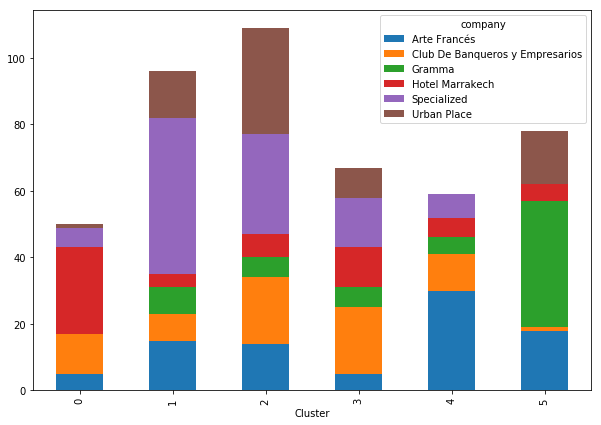

In [60]:
stacked = df_pos.groupby(['company','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='company', values=0)
pivot_df.loc[:,companies].plot.bar(stacked=True, figsize=(10,7))

Se pueden hacer varios k-means: 
1. Entre negatives y positives de la misma compañía
2. Entre canciones de distintas compañías (todas o los positives (ult pl))